In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [92]:
df=pd.read_csv(r'C:\Users\Abhishek\OneDrive\Desktop\DS_projects\Datasets\survey.csv')

In [93]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [111]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

<Axes: xlabel='Age', ylabel='Count'>

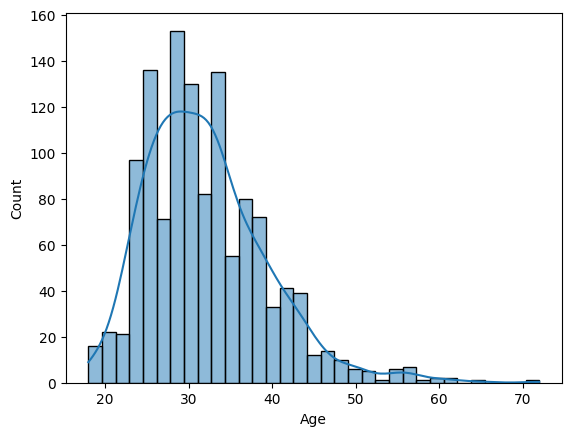

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'],kde=True)

In [30]:
df['Gender']

0       Female
1            M
2         Male
3         Male
4         Male
         ...  
1254      male
1255      Male
1256      male
1257         f
1258      Male
Name: Gender, Length: 1251, dtype: object

In [31]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [95]:
import re
def clean_tex(g):
    g=g.lower().strip()
    g=re.sub(r'[^\w\s]', '', g)
    
    return g

In [96]:
df['Gender'] = df['Gender'].apply(clean_tex)


In [97]:
def normalize_gender(g):
        if g in ['male', 'm', 'man', 'male cis', 'cismale', 'mal', 'maile', 'make', 'msle', 'mail', 'malr', 'guy ish', 'maleish', 'something kinda male', 'male leaning androgynous', 'ostensibly male unsure what that really means']:
            return 'Male'
        elif g in ['female', 'f', 'woman', 'cis female', 'cisfemale', 'femake', 'femail', 'female cis', 'female trans', 'transfemale']:
            return 'Female'
        else:
            return 'Non-binary/Other'

In [98]:
df['Gender'] = df['Gender'].apply(normalize_gender)


In [99]:
df=pd.get_dummies(df,prefix='gender',columns=['Gender'],drop_first=True)

In [100]:
df[['gender_Male', 'gender_Non-binary/Other']] = df[['gender_Male', 'gender_Non-binary/Other']].astype(int)


In [38]:
self=df[['supervisor','self_employed']]

In [101]:
def clean_self(row):
    if pd.isna(row['self_employed']):
        if row['supervisor'] == 'Yes':
            return 'Yes'
        elif row['supervisor'] == 'No':
            return 'No'

    return row['self_employed']       

In [102]:
df['self_employed'] = df.apply(clean_self,axis=1)

In [103]:
df['self_employed'].isnull().sum()

np.int64(2)

In [106]:
df['work_interfere'].isnull().sum()

np.int64(0)

In [105]:
df['work_interfere'].fillna('Unknown', inplace=True)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_38292\393215549.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_interfere'].fillna('Unknown', inplace=True)


In [107]:
df.drop(['comments', 'state', 'Timestamp'], axis=1, inplace=True)


In [108]:
df['treatment']

0       Yes
1        No
2        No
3       Yes
4        No
       ... 
1254    Yes
1255    Yes
1256    Yes
1257     No
1258    Yes
Name: treatment, Length: 1259, dtype: object

In [50]:
# Task 2A: Understand the Target Distribution
# How many people reported seeking treatment?

# 🔹 What to Do:
# Countplot of treatment

# Pie chart (optional) to show proportion

# 🧠 What to Look For:
# Is it balanced or imbalanced?

# Any need for class balancing in modeling?

<Axes: xlabel='treatment', ylabel='count'>

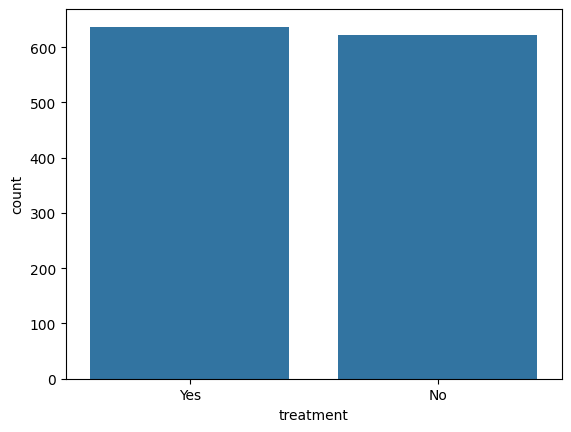

In [109]:
sns.countplot(df, x="treatment")

In [ ]:
#balanced data set does not need cleaning 

<Axes: xlabel='Age', ylabel='Count'>

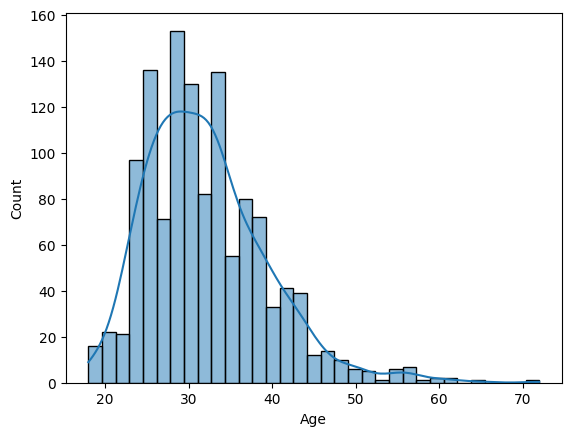

In [113]:
sns.histplot(df, x="Age",kde= True)

In [57]:
df

,Age,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_Male,gender_Non-binary/Other
0,37,United States,Yes,No,Yes,Often,6-25,No,Yes,Yes,...,No,No,Some of them,Yes,No,Maybe,Yes,No,0,0
1,44,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Maybe,No,No,No,No,No,Don't know,No,1,0
2,32,Canada,Yes,No,No,Rarely,6-25,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,No,No,1,0
3,31,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,1,0
4,31,United States,Yes,No,No,Never,100-500,Yes,Yes,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,United Kingdom,No,No,Yes,Unknown,26-100,No,Yes,No,...,No,No,Some of them,Some of them,No,No,Don't know,No,1,0
1255,32,United States,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,No,No,Some of them,Yes,No,No,Yes,No,1,0
1256,34,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Yes,Yes,No,No,No,No,No,No,1,0
1257,46,United States,No,No,No,Unknown,100-500,Yes,Yes,No,...,Yes,No,No,No,No,No,No,No,0,0


<Axes: xlabel='gender_Non-binary/Other', ylabel='count'>

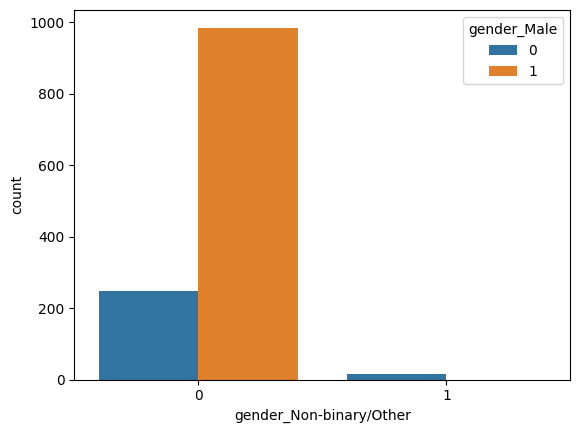

In [61]:
sns.countplot(df, x="gender_Non-binary/Other",hue='gender_Male')


The dataset is heavily skewed toward binary gender identities, especially Male respondents, who make up the majority.
Non-binary/Other respondents are significantly underrepresented, with very few records — likely under 1% of the sample.
This may limit our ability to draw strong model conclusions or segment-level insights for non-binary users.

In [ ]:
#  Task 2C: Treatment vs Gender
# 🔹 What to Do:
# Grouped barplot or hue-based countplot:

# python
# Copy
# Edit
# sns.countplot(x='Gender', hue='treatment', data=df)
# 🧠 What to Look For:

<Axes: xlabel='gender_Male', ylabel='count'>

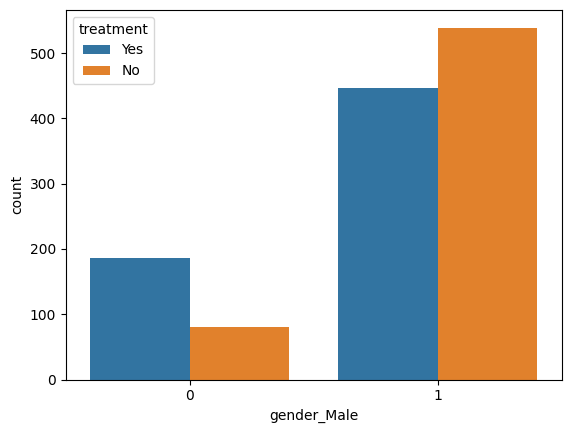

In [63]:
sns.countplot(x='gender_Male', hue='treatment', data=df)

Males are significantly less likely to report seeking mental health treatment compared to females and non-binary respondents.
Among female/non-binary individuals, a larger proportion seek treatment relative to those who don’t — a reversal of the male trend.
This indicates gender-specific behavioral patterns toward mental health in the tech industry, likely influenced by stigma, awareness, or accessibility.

<Axes: xlabel='remote_work', ylabel='count'>

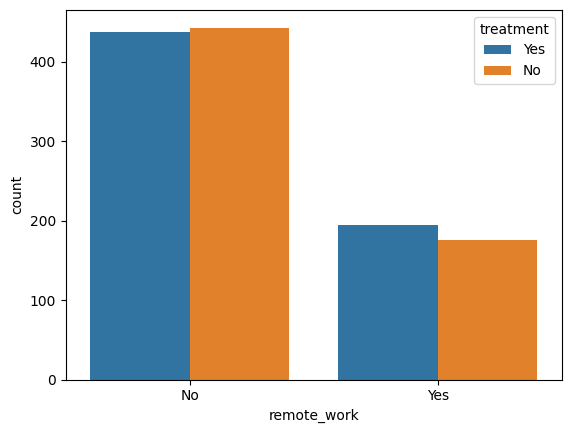

In [64]:
sns.countplot(x='remote_work', hue='treatment', data=df)


In [ ]:
no great impact simlar treatment 

<Axes: xlabel='work_interfere', ylabel='count'>

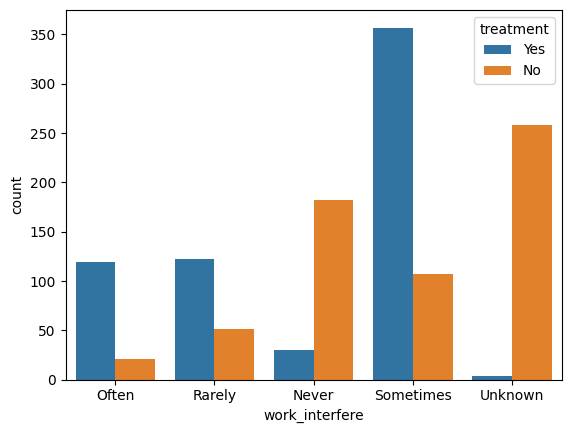

In [65]:
sns.countplot(x='work_interfere', hue='treatment', data=df)


There is a strong positive correlation between perceived work interference and seeking mental health treatment.
Respondents who reported that their mental health 'Often' or 'Sometimes' interferes with work are far more likely to seek treatment compared to those who reported 'Rarely' or 'Never'.
Those who selected 'Never' or 'Unknown' are overwhelmingly less likely to report seeking help.

<Axes: xlabel='treatment', ylabel='Age'>

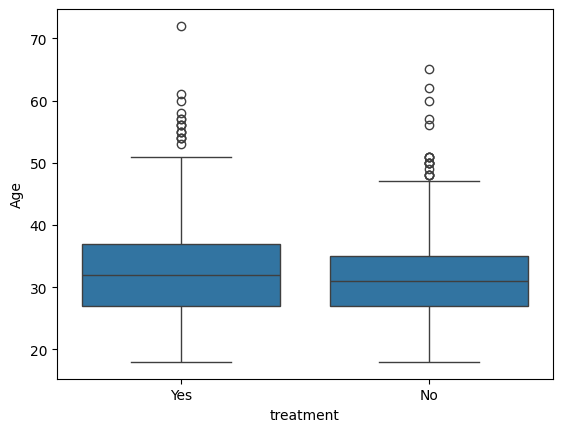

In [66]:
sns.boxplot(x='treatment', y='Age', data=df)


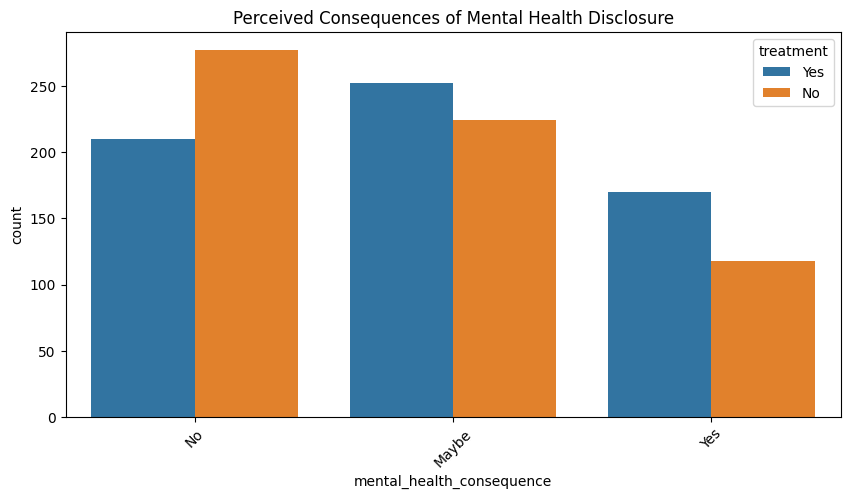

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='mental_health_consequence', hue='treatment', data=df)
plt.title("Perceived Consequences of Mental Health Disclosure")
plt.xticks(rotation=45)
plt.show()


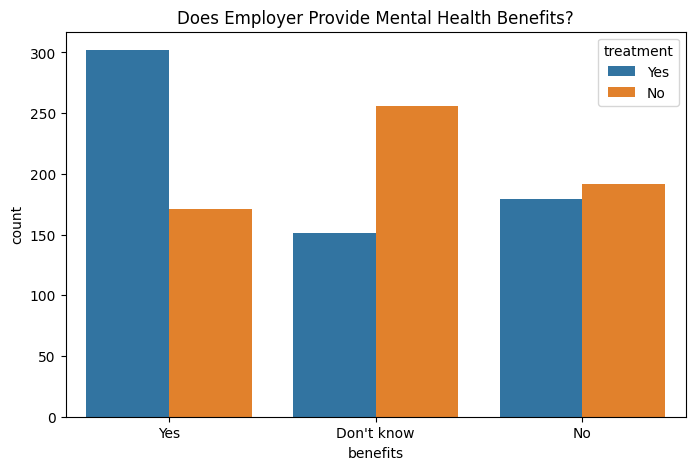

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(x='benefits', hue='treatment', data=df)
plt.title("Does Employer Provide Mental Health Benefits?")
plt.show()


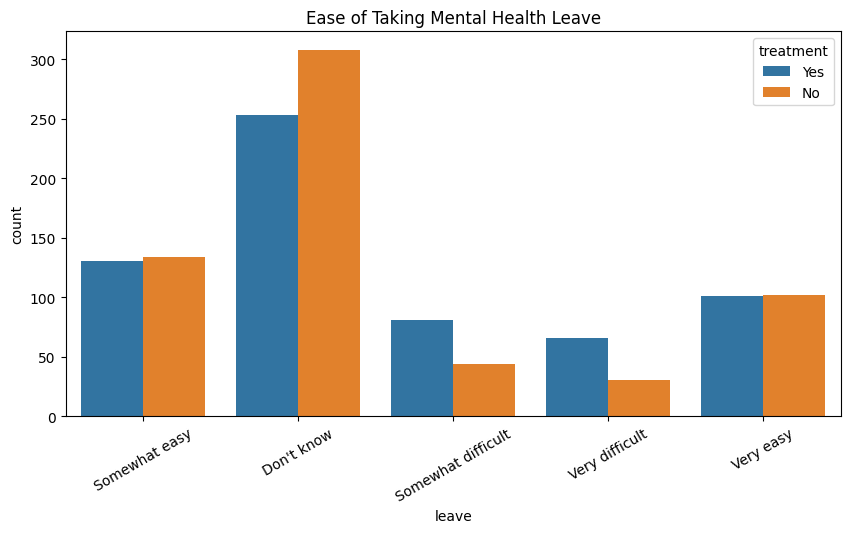

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(x='leave', hue='treatment', data=df)
plt.title("Ease of Taking Mental Health Leave")
plt.xticks(rotation=30)
plt.show()


Employees who perceive mental health leave as difficult to take are more likely to seek external treatment, potentially due to lack of workplace support.
Interestingly, those who don't know about their company's leave policy are least likely to seek treatment — indicating that lack of clarity alone discourages action.
Those who say it's easy or very easy to take leave show more balanced behavior, implying that supportive policy does not guarantee action, but ambiguity and restriction are strong deterrents.

In [116]:
def assign_age_bracket(age):
    if 18 <= age <= 25:
        return '18–25'
    elif 26 <= age <= 35:
        return '26–35'
    elif 36 <= age <= 45:
        return '36–45'
    elif 46 <= age <= 60:
        return '46–60'
    elif age > 60:
        return '60+'
    else:
        return 'Under 18'

# Use apply
df['Age Bracket'] = df['Age'].apply(assign_age_bracket)

In [115]:
df.columns

Index(['Age', 'Country', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'gender_Male',
       'gender_Non-binary/Other'],
      dtype='object')

In [75]:
df=df.drop('Age Group',axis=1)

In [117]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['treatment']=label.fit_transform(df['treatment'])

In [118]:
df['treatment']

0       1
1       0
2       0
3       1
4       0
       ..
1254    1
1255    1
1256    1
1257    0
1258    1
Name: treatment, Length: 1251, dtype: int64

In [121]:
columns_to_encode = [
    'Age Bracket',
    'self_employed',
    'work_interfere',
    'remote_work',
    'leave',
    'benefits',
    'mental_health_consequence',
    'care_options',
    'wellness_program',
    'anonymity'
]

df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Convert only boolean columns to int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)



In [122]:
df['Age Bracket_36–45']

0       1
1       1
2       0
3       0
4       0
       ..
1254    0
1255    0
1256    0
1257    0
1258    0
Name: Age Bracket_36–45, Length: 1251, dtype: int64

In [123]:
df

,Age,Country,family_history,treatment,no_employees,tech_company,seek_help,phys_health_consequence,coworkers,supervisor,...,benefits_No,benefits_Yes,mental_health_consequence_No,mental_health_consequence_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,anonymity_No,anonymity_Yes
0,37,United States,No,1,6-25,Yes,Yes,No,Some of them,Yes,...,0,1,1,0,1,0,1,0,0,1
1,44,United States,No,0,More than 1000,No,Don't know,No,No,No,...,0,0,0,0,0,0,0,0,0,0
2,32,Canada,No,0,6-25,Yes,No,No,Yes,Yes,...,1,0,1,0,0,0,1,0,0,0
3,31,United Kingdom,Yes,1,26-100,Yes,No,Yes,Some of them,No,...,1,0,0,1,0,1,1,0,1,0
4,31,United States,No,0,100-500,Yes,Don't know,No,Some of them,Yes,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,United Kingdom,No,1,26-100,Yes,No,No,Some of them,Some of them,...,1,0,1,0,0,0,1,0,0,0
1255,32,United States,Yes,1,26-100,Yes,No,No,Some of them,Yes,...,0,1,1,0,0,1,1,0,0,1
1256,34,United States,Yes,1,More than 1000,Yes,No,Yes,No,No,...,0,1,0,1,0,1,1,0,0,0
1257,46,United States,No,0,100-500,Yes,No,No,No,No,...,1,0,0,1,0,1,1,0,0,0


In [80]:
df.columns

Index(['Age', 'Country', 'family_history', 'treatment', 'no_employees',
       'tech_company', 'seek_help', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'gender_Male',
       'gender_Non-binary/Other', 'Age Bracket_26–35', 'Age Bracket_36–45',
       'Age Bracket_46–60', 'Age Bracket_60+', 'self_employed_Unknown',
       'self_employed_Yes', 'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'work_interfere_Unknown', 'remote_work_Yes',
       'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy', 'benefits_No',
       'benefits_Yes', 'mental_health_consequence_No',
       'mental_health_consequence_Yes', 'care_options_Not sure',
       'care_options_Yes', 'wellness_program_No', 'wellness_program_Yes',
       'anonymity_No', 'anonymity_Yes'],
      dtype='object')

In [124]:
# This includes Age and all one-hot encoded columns (0s and 1s)
numeric_df = df[[col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]]


In [126]:
numeric_df.columns

Index(['Age', 'treatment', 'gender_Male', 'gender_Non-binary/Other',
       'Age Bracket_26–35', 'Age Bracket_36–45', 'Age Bracket_46–60',
       'Age Bracket_60+', 'self_employed_Yes', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes',
       'work_interfere_Unknown', 'remote_work_Yes', 'leave_Somewhat difficult',
       'leave_Somewhat easy', 'leave_Very difficult', 'leave_Very easy',
       'benefits_No', 'benefits_Yes', 'mental_health_consequence_No',
       'mental_health_consequence_Yes', 'care_options_Not sure',
       'care_options_Yes', 'wellness_program_No', 'wellness_program_Yes',
       'anonymity_No', 'anonymity_Yes'],
      dtype='object')

In [127]:
X = numeric_df.drop('treatment', axis=1)
y = df['treatment']


In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [129]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8111702127659575
Precision: 0.7553648068669528
Recall: 0.9263157894736842
F1 Score: 0.8321513002364066


In [130]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8111702127659575
Precision: 0.771689497716895
Recall: 0.8894736842105263
F1 Score: 0.8264058679706602


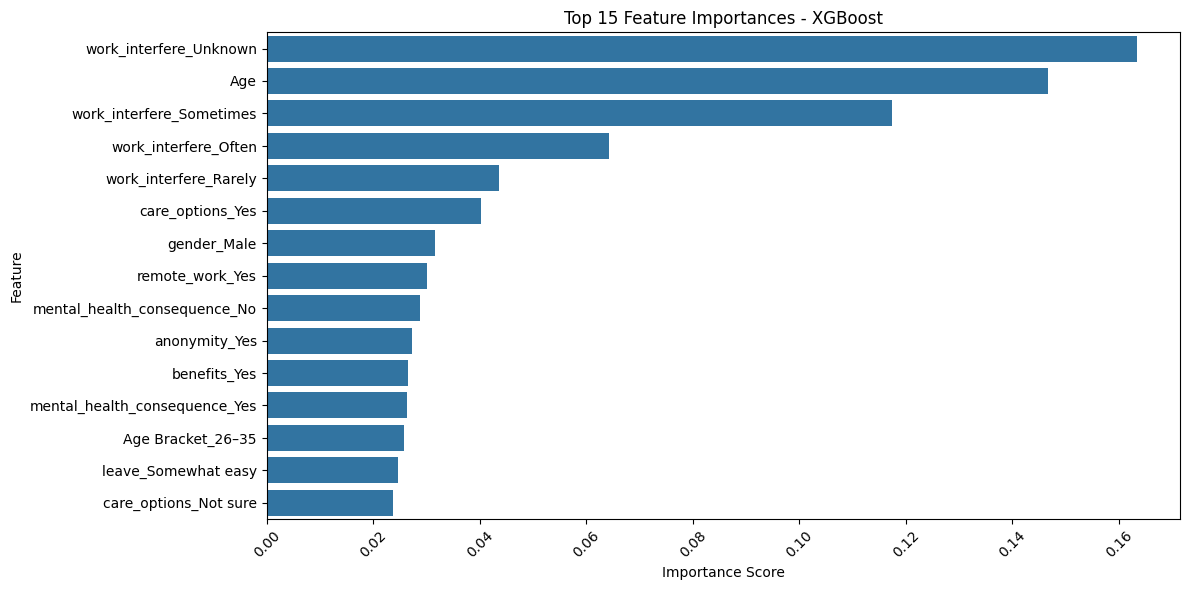

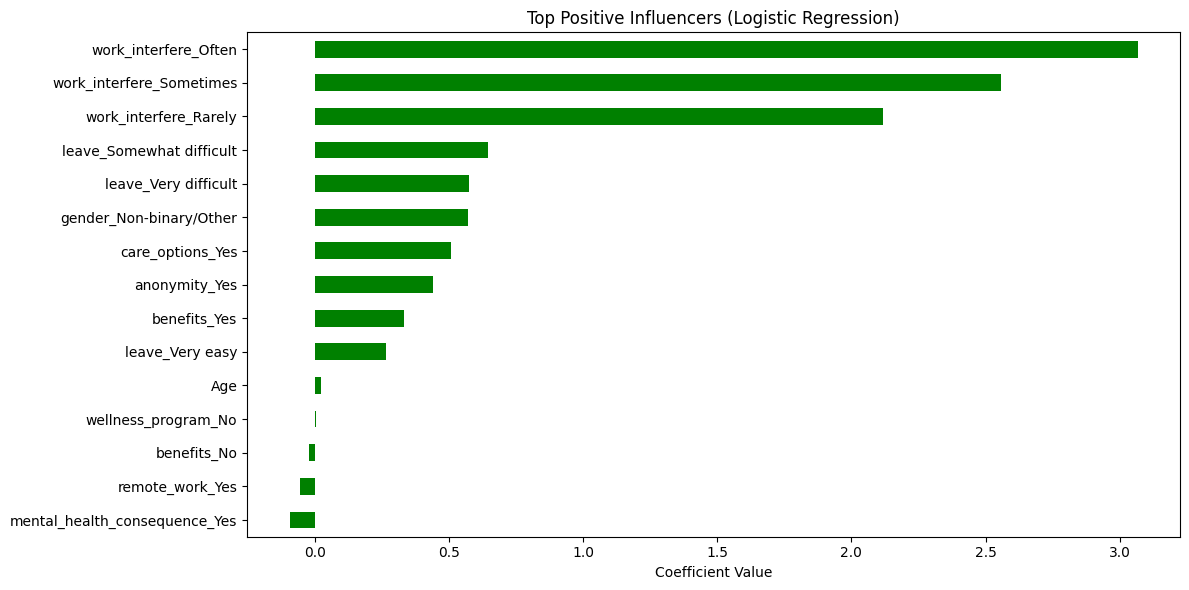

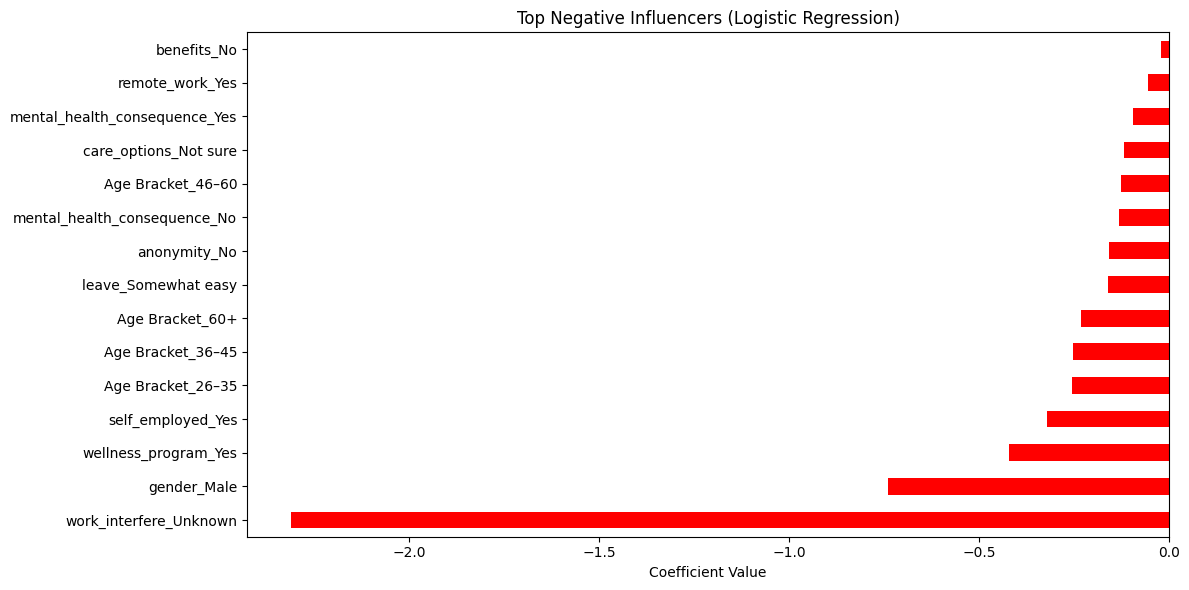

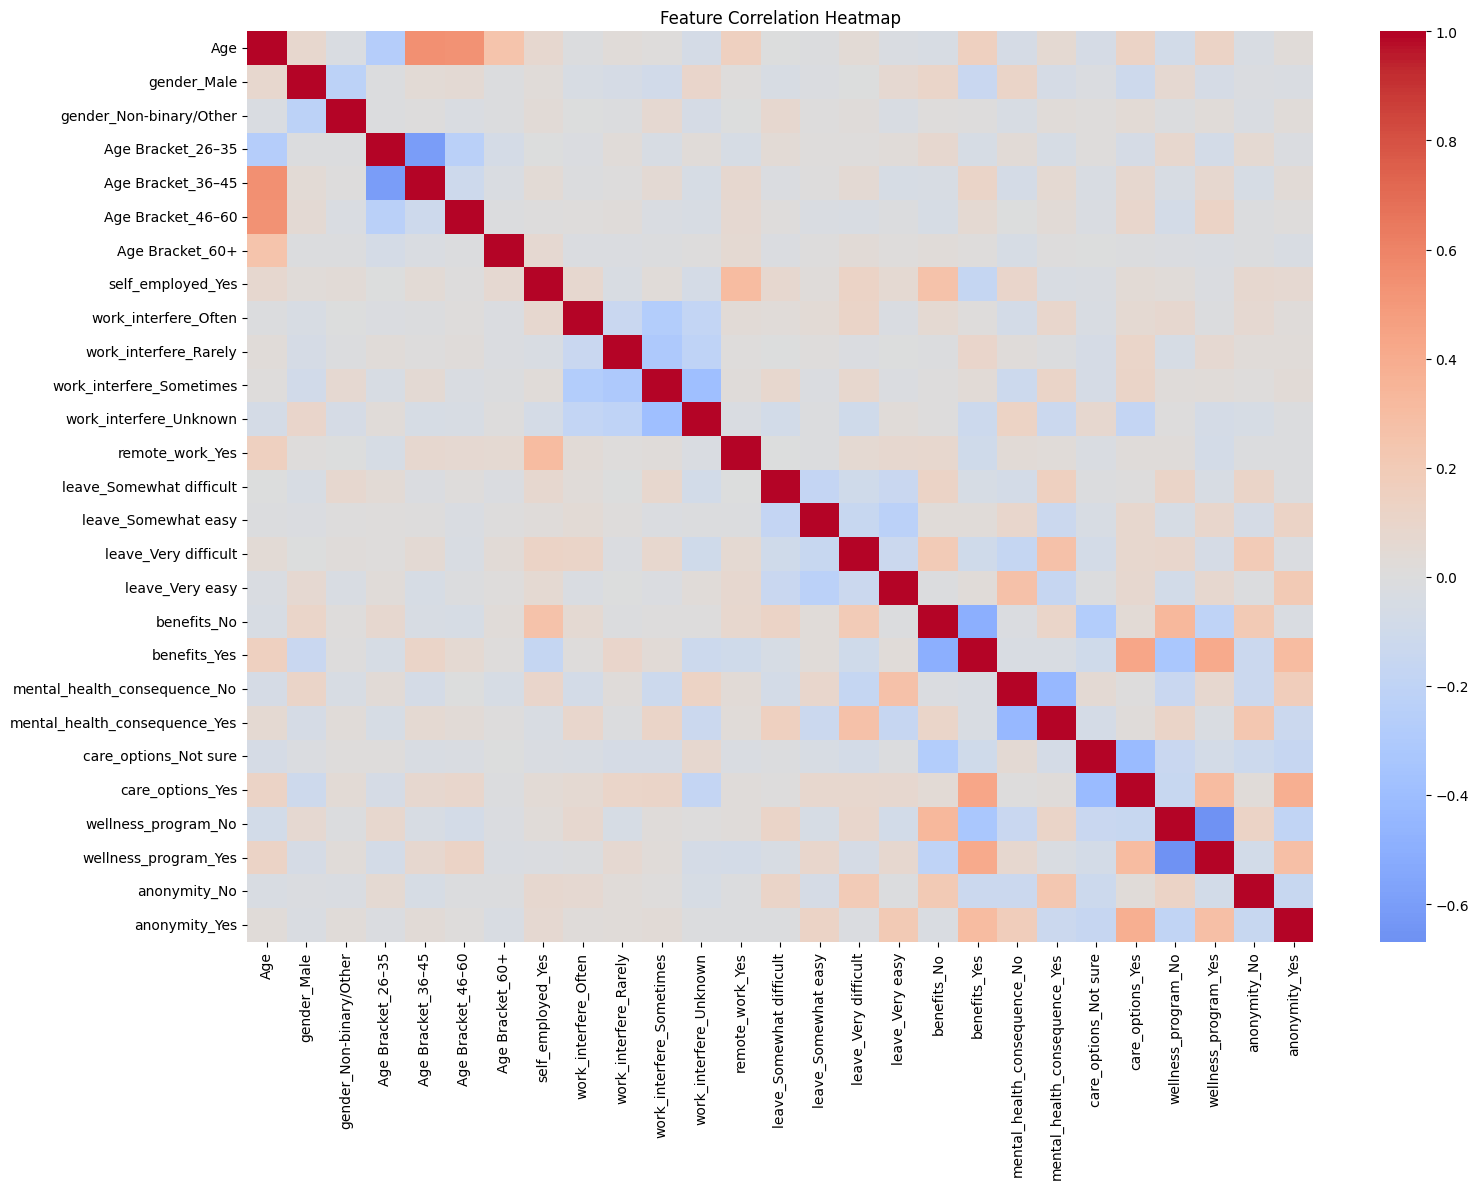

In [133]:
# Task 5A: XGBoost Feature Importances
xgb_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=xgb_importances[:15], y=xgb_importances.index[:15])
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 5C: Logistic Regression Coefficients
logreg_coef = pd.Series(logreg.coef_[0], index=X.columns).sort_values()

plt.figure(figsize=(12, 6))
logreg_coef.tail(15).plot(kind='barh', color='green')
plt.title("Top Positive Influencers (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
logreg_coef.head(15).plot(kind='barh', color='red')
plt.title("Top Negative Influencers (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

# Task 5D: Correlation Heatmap
plt.figure(figsize=(16, 12))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
